# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn import svm
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Creating A function that will upload to Dataset

In [2]:
def load_mnist( path, kind='train'):
    

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
data_path=''
train_image, train_label= load_mnist(data_path,kind='train')


# Creating Pandas DataFrame with test and train dataset

In [3]:
feat_cols = [ 'pixel'+str(i) for i in range(train_image.shape[1]) ]
dataset = pd.DataFrame(train_image,columns=feat_cols)
dataset['label'] = train_label


In [4]:
test_image, test_label= load_mnist(data_path,kind='t10k')
feat_cols = [ 'pixel'+str(i) for i in range(test_image.shape[1]) ]
test_set = pd.DataFrame(test_image,columns=feat_cols)
test_set['label'] = test_label
test_set.shape

(10000, 785)

# Information About training Dataset

In [5]:
dataset.shape

(60000, 785)

In [6]:
dataset.head(20)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       1       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0      33   
4        0       0       0       0       0       0       0       0       0   
5        0       0       0       0       1       0       0       0       0   
6        0       0       0       0       0       0       0       0       0   
7        0       0       0       0       0       1       1       0       0   
8        0       0       0       0       0       0       0       0       0   
9        0       0       0       0       0       0       0       0       0   
10       0       0       0       0       0       0       0      11     142   
11       0       0       0       0       0       0       0       0       0   
12       0       0       0       0       0       0       0       0       0   
13       0       0       0       0       0       0       0       0       0   
14       0       0       0       0       0       0       0       0       0   
15       0       0       0       0       0       0       0       0       0   
16       0       0       0       0       0       0       0       0       0   
17       0       0       0       0       0       0       0       0       0   
18       0       0       0       2       0       2       0       0       6   
19       0       0       0       0       0       0       0       2       0   

    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...       114       130        76         0         0         0   
2       22  ...         0         1         0         0         0         0   
3       96  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   
5       22  ...         0         0         0       133       167        73   
6        0  ...         0         0         0         0         0         0   
7        0  ...         0         3         0        82       237       231   
8        0  ...         0         0         0         0         0         0   
9        0  ...         0         0         0         0         0         0   
10     200  ...       110       158        18         0         3         0   
11       0  ...         0        64        42        24         0         0   
12       0  ...         0         0         0         0         0         0   
13       0  ...         0         0         0         0         0         0   
14       0  ...         0         0         0         0         0         0   
15       0  ...         0         0         0         0         0         0   
16      53  ...       188       107         0         0         0         0   
17       0  ...        80        46         0         0         1         0   
18      36  ...         0         0         0        15       160       100   
19       0  ...        56        67        22         0         2         0   

    pixel781  pixel782  pixel783  label  
0          0         0         0      9  
1          0         0         0      0  
2          0         0         0      0  
3          0         0         0      3  
4          0         0         0      0  
5          0         0         0      2  
6          0         0         0      7  
7         70         0         0      2  
8          0         0         0      5  
9          0         0         0      5  
10         0         0         0      0  
11         0         0         0      9  
12         0         0         0      5  
13         0         0         0      5  
14         0         0         0      7  
15         0         0         0 

In [7]:
dataset.describe()

pixel0        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394      8.309935     14.201820     23.835980     38.204702   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      230.000000    221.000000    221.000000    254.000000    255.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     23.208633     16.576250     17.831967     22.918850   
std    ...     48.881430     42.044318     43.911297     51.928401   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      8.000000      0.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      17.916900      8.485717      2.706333      0.819000      0.070883   
std       45.173634     29.448614     17.258682      9.133252      2.075829   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    170.000000   

              label  
count  60000.000000  
mean       4.500000  
std        2.872305  
min        0.000000  
25%        2.000000  
50%        4.500000  
75%        7.000000  
max        9.000000  

[8 rows x 785 columns]

In [8]:
dataset.groupby('label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [9]:
dataset.dtypes

pixel0      uint8
pixel1      uint8
pixel2      uint8
pixel3      uint8
pixel4      uint8
            ...  
pixel780    uint8
pixel781    uint8
pixel782    uint8
pixel783    uint8
label       uint8
Length: 785, dtype: object

# Pearson Statistical Analysis

In [10]:
dataset.corr(method='pearson')

pixel0    pixel1    pixel2    pixel3    pixel4    pixel5  \
pixel0    1.000000  0.323753  0.104725  0.045164  0.025112  0.013816   
pixel1    0.323753  1.000000  0.562747  0.059439  0.070743  0.043161   
pixel2    0.104725  0.562747  1.000000  0.342158  0.152222  0.109535   
pixel3    0.045164  0.059439  0.342158  1.000000  0.615420  0.346866   
pixel4    0.025112  0.070743  0.152222  0.615420  1.000000  0.701805   
...            ...       ...       ...       ...       ...       ...   
pixel780  0.000224  0.017853  0.031332  0.027537  0.027140  0.041103   
pixel781  0.003225  0.036215  0.052375  0.014578  0.028075  0.042326   
pixel782  0.006560  0.029530  0.027990  0.002397  0.022540  0.029894   
pixel783  0.032583  0.020615  0.024343  0.007845  0.007122  0.003657   
label    -0.001254 -0.003763 -0.025644 -0.006893 -0.004135 -0.008915   

            pixel6    pixel7    pixel8    pixel9  ...  pixel775  pixel776  \
pixel0    0.011129  0.012302  0.009424  0.000213  ...  0.004763  0.004631   
pixel1    0.027905  0.019830  0.019246  0.011690  ...  0.013629  0.017704   
pixel2    0.074838  0.046004  0.040848  0.032191  ...  0.036896  0.042103   
pixel3    0.249687  0.143525  0.087865  0.051165  ...  0.019608  0.025240   
pixel4    0.417610  0.226949  0.133628  0.075431  ...  0.029963  0.038999   
...            ...       ...       ...       ...  ...       ...       ...   
pixel780  0.037830  0.026515  0.037151  0.043200  ...  0.008156  0.043917   
pixel781  0.031397  0.022455  0.023691  0.022171  ...  0.030916  0.069751   
pixel782  0.017431  0.008204  0.004588 -0.004224  ...  0.023707  0.049724   
pixel783  0.003625  0.001797  0.000368 -0.001556  ...  0.025193  0.033479   
label    -0.035173 -0.084296 -0.161638 -0.300932  ... -0.259398 -0.183781   

          pixel777  pixel778  pixel779  pixel780  pixel781  pixel782  \
pixel0    0.000870 -0.002650 -0.002077  0.000224  0.003225  0.006560   
pixel1    0.011012  0.002940  0.006486  0.017853  0.036215  0.029530   
pixel2    0.021772  0.007821  0.012515  0.031332  0.052375  0.027990   
pixel3    0.018474  0.011733  0.011988  0.027537  0.014578  0.002397   
pixel4    0.030544  0.018605  0.020263  0.027140  0.028075  0.022540   
...            ...       ...       ...       ...       ...       ...   
pixel780  0.135621  0.447524  0.747581  1.000000  0.639731  0.329378   
pixel781  0.091967  0.149885  0.338283  0.639731  1.000000  0.647931   
pixel782  0.073412  0.098708  0.172767  0.329378  0.647931  1.000000   
pixel783  0.040981  0.048968  0.075924  0.139403  0.241326  0.501408   
label    -0.091759 -0.080668 -0.068461 -0.017691  0.045348  0.058090   

          pixel783     label  
pixel0    0.032583 -0.001254  
pixel1    0.020615 -0.003763  
pixel2    0.024343 -0.025644  
pixel3    0.007845 -0.006893  
pixel4    0.007122 -0.004135  
...            ...       ...  
pixel780  0.139403 -0.017691  
pixel781  0.241326  0.045348  
pixel782  0.501408  0.058090  
pixel783  1.000000  0.024013  
label     0.024013  1.000000  

[785 rows x 785 columns]

In [11]:
dataset.skew()

pixel0      151.338198
pixel1       88.444453
pixel2       91.912714
pixel3       44.602116
pixel4       29.847529
               ...    
pixel780      4.245614
pixel781      8.010447
pixel782     14.559767
pixel783     43.403256
label         0.000000
Length: 785, dtype: float64

# Histogram Representation of Every Future

In [12]:
dataset.hist(color='cyan',layout=(29,28),figsize=(256,256)) 
plt.show()

# Scatter Matrix Representation 

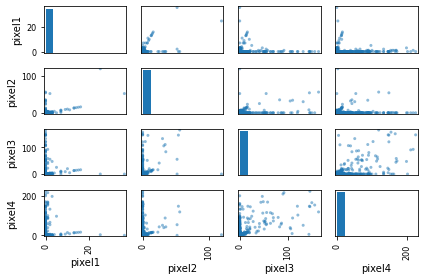

In [13]:
pd.plotting.scatter_matrix(dataset[['pixel1','pixel2','pixel3','pixel4']])
plt.tight_layout()
plt.show()

# Correlation Matrix  Representation

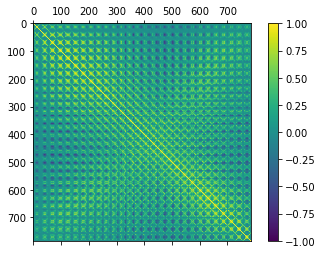

In [14]:
correlation=dataset.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()


#  Predictions And Analysis with Different Algorithms

In [15]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results=[]
names=[]
seed=7
for name, model in models:
    kfold=KFold(n_splits=9,random_state=seed)
    cv_results=cross_val_score(model,train_image,train_label,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    nsg = '%s %f (%f)'% (name,cv_results.mean(), cv_results.std())
    print(nsg)

LR 0.852800 (0.004595)
LDA 0.824033 (0.006242)
CART 0.797067 (0.004583)
NB 0.588133 (0.011698)


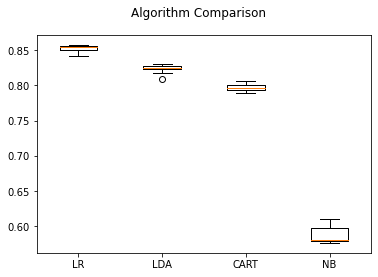

In [16]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
cart= DecisionTreeClassifier()
cart.fit(train_image,train_label)
predictions=cart.predict(test_image)
print('accuracy: ',accuracy_score(test_label,predictions))
print('Confusion matrix: \n ',confusion_matrix(test_label,predictions))
print('Classification report: \n ',classification_report(test_label,predictions))


accuracy:  0.7893
Confusion matrix: 
  [[730   4  30  38   9   4 175   0   9   1]
 [  5 950   4  19   8   0   9   0   4   1]
 [ 21   2 649  17 151   2 144   0  12   2]
 [ 43  29  19 775  63   0  55   0  16   0]
 [ 11   3 181  53 646   1  97   0   7   1]
 [  0   2   0   2   2 877   0  59  21  37]
 [136   7 132  39 105   2 555   2  19   3]
 [  0   0   0   0   0  43   0 892   6  59]
 [  9   2  19   7   8  13  19   6 912   5]
 [  1   0   0   0   0  20   0  67   5 907]]
Classification report: 
                precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.63      0.65      0.64      1000
           3       0.82      0.78      0.79      1000
           4       0.65      0.65      0.65      1000
           5       0.91      0.88      0.89      1000
           6       0.53      0.56      0.54      1000
           7       0.87      0.89      0.88      1000
           8     